In [1]:
from matplotlib import pyplot as plt
from torch import manual_seed

from pathlib import Path
from karpathy_series.makemore.data import read_data
from karpathy_series.makemore.models.frequentist import FreqModel
from karpathy_series.makemore.models.net import OneLayer, MultiLayer, Learner
from karpathy_series.makemore.encoding.word_encoding import DelimitedWordEncoder
from karpathy_series.makemore.models.training import make_training
from karpathy_series.makemore.models.embedding import OneHotEnbedding

%matplotlib inline

In [2]:
generator = manual_seed(2147483647)

In [3]:
# Read data
data_path = Path("../../data/names.txt")
words = read_data(data_path)
encoding = DelimitedWordEncoder.from_charset(frozenset(''.join(words)))
token_words = list(map(encoding.encode, words))

In [6]:
freq_model = FreqModel.from_words(encoding.token_count, encoding.boundary, token_words)

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

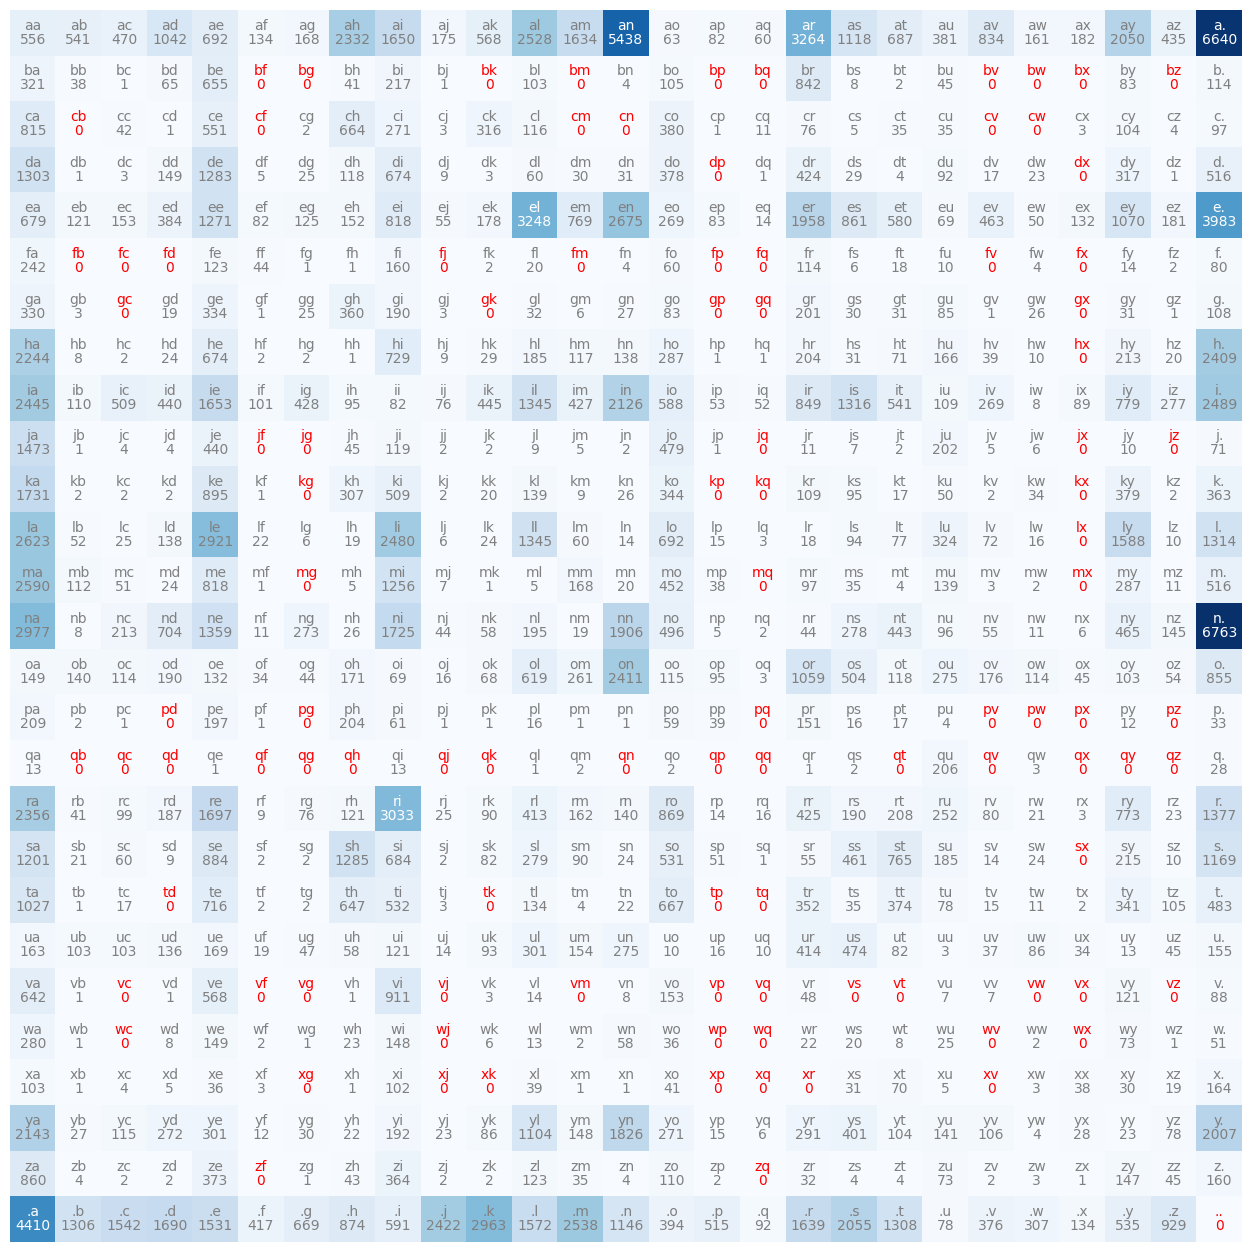

In [5]:
plt.figure(figsize=(16, 16))
plt.imshow(freq_model.under, cmap="Blues")
for i, j, count in freq_model.items():
    code = encoding.decode_letter(i) + encoding.decode_letter(j)
    color = "red" if count == 0 else ("white" if count > 3000 else "gray")
    plt.text(j, i, code, ha="center", va="bottom", color=color)
    plt.text(j, i, count, ha="center", va="top", color=color)
plt.axis("off")

In [7]:
generated = [freq_model.generate() for _ in range(10000)]
generated_stream = encoding.form_token_stream(generated)
freq_model.loss(generated_stream)

2.4592071726630054

In [4]:
xis, yis = make_training(token_words)

In [5]:
embedding = OneHotEnbedding(encoding.token_count)
one_layer = OneLayer.init_random_from_size(encoding.token_count)

In [6]:
xs, ys = map(embedding, (xis, yis))

In [7]:
learner = Learner(one_layer, 50)
learner(((xs, ys),), epochs=10)

Epoch 0 is running:
    loss = 3.7126548290252686
Epoch 0 is finished with loss = 3.7126548290252686
Epoch 1 is running:
    loss = 3.5537374019622803
Epoch 1 is finished with loss = 3.5537374019622803
Epoch 2 is running:
    loss = 3.428408622741699
Epoch 2 is finished with loss = 3.428408622741699
Epoch 3 is running:
    loss = 3.3227713108062744
Epoch 3 is finished with loss = 3.3227713108062744
Epoch 4 is running:
    loss = 3.233344554901123
Epoch 4 is finished with loss = 3.233344554901123
Epoch 5 is running:
    loss = 3.158259630203247
Epoch 5 is finished with loss = 3.158259630203247
Epoch 6 is running:
    loss = 3.0954322814941406
Epoch 6 is finished with loss = 3.0954322814941406
Epoch 7 is running:
    loss = 3.04237699508667
Epoch 7 is finished with loss = 3.04237699508667
Epoch 8 is running:
    loss = 2.996767997741699
Epoch 8 is finished with loss = 2.996767997741699
Epoch 9 is running:
    loss = 2.956885814666748
Epoch 9 is finished with loss = 2.956885814666748


In [11]:
multi_layer = MultiLayer.init_random_from_size(encoding.token_count, [200])

In [15]:
m_learner = Learner(multi_layer, 200)
m_learner(((xs, ys),), epochs=100)

Epoch 0 is running:
    loss = 2.473564863204956
Epoch 0 is finished with loss = 2.473564863204956
Epoch 1 is running:
    loss = 2.4771440029144287
Epoch 1 is finished with loss = 2.4771440029144287
Epoch 2 is running:
    loss = 2.4956278800964355
Epoch 2 is finished with loss = 2.4956278800964355
Epoch 3 is running:
    loss = 2.4832098484039307
Epoch 3 is finished with loss = 2.4832098484039307
Epoch 4 is running:
    loss = 2.4850990772247314
Epoch 4 is finished with loss = 2.4850990772247314
Epoch 5 is running:
    loss = 2.488473653793335
Epoch 5 is finished with loss = 2.488473653793335
Epoch 6 is running:
    loss = 2.5125088691711426
Epoch 6 is finished with loss = 2.5125088691711426
Epoch 7 is running:
    loss = 2.4886088371276855
Epoch 7 is finished with loss = 2.4886088371276855
Epoch 8 is running:
    loss = 2.4797918796539307
Epoch 8 is finished with loss = 2.4797918796539307
Epoch 9 is running:
    loss = 2.4799203872680664
Epoch 9 is finished with loss = 2.47992038726